Finally we'll look to see if Job Satisfaction and Salary seem to be linked in any way to whether people code as a hobby

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

df = pd.read_csv('./survey_results/2020/survey_results_public.csv')
schema = pd.read_csv('./survey_results/2020/survey_results_schema.csv')

# Create a new column which maps Hobbyist to numerical values, so that aggregate statistics become easier
df['HobbyistNum'] = df['Hobbyist'].replace(to_replace={'Yes': 1, 'No': 0})
df['ConvertedCompBin'], bins = pd.qcut(df['ConvertedComp'], q=20, retbins=True)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,HobbyistNum,ConvertedCompBin
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,1.0,NaN
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,0.0,NaN
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,1.0,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,1.0,NaN
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8,1.0,NaN


In [2]:
yes_df = df[df['Hobbyist'] == 'Yes']['ConvertedCompBin'].value_counts().sort_index()
no_df = df[df['Hobbyist'] == 'No']['ConvertedCompBin'].value_counts().sort_index()

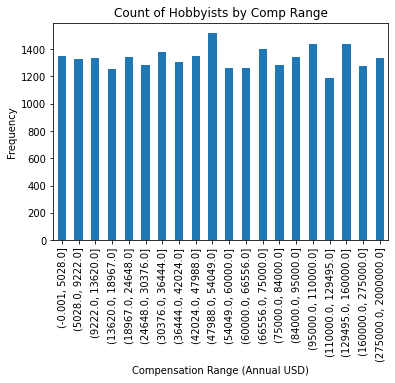

In [3]:
yes_df.plot(kind='bar', title='Count of Hobbyists by Comp Range', xlabel='Compensation Range (Annual USD)', ylabel='Frequency');

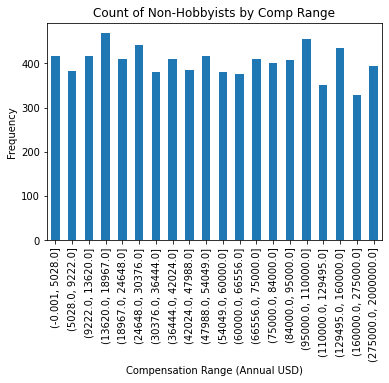

In [4]:
no_df.plot(kind='bar', title='Count of Non-Hobbyists by Comp Range', xlabel='Compensation Range (Annual USD)', ylabel='Frequency');

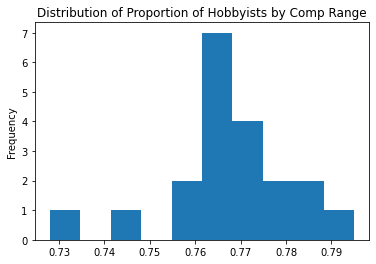

In [5]:
df[['ConvertedCompBin','HobbyistNum']].groupby('ConvertedCompBin').mean().plot(kind='hist', legend=False, title='Distribution of Proportion of Hobbyists by Comp Range', ylabel='Frequency');

Above we can see that again there there is little change in whether someone programs as a hobby or not as their salary increases.

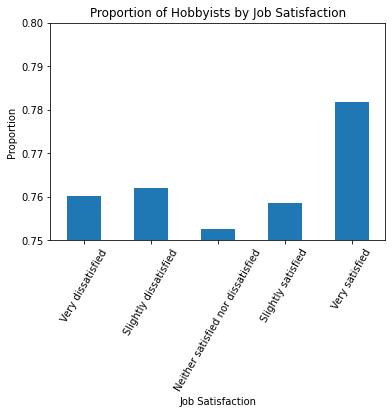

In [6]:
sort_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied',
]
df[['JobSat','HobbyistNum']].groupby('JobSat').mean().reindex(sort_order).plot(kind='bar', legend=False, rot=60, ylim=(0.75,0.8), title='Proportion of Hobbyists by Job Satisfaction', xlabel='Job Satisfaction', ylabel='Proportion');

Interestingly job satisfaction does not appear to be a good indicator either, suggesting that whilst people are disatisfied with their job they are not unhappy with programming as a whole.

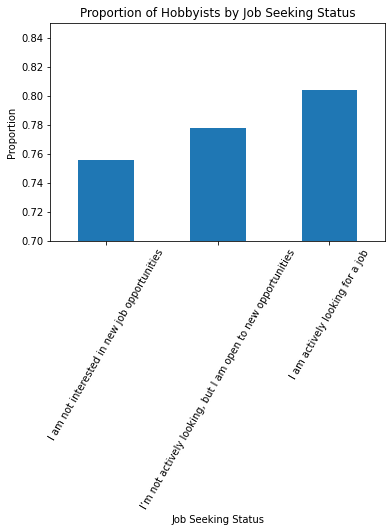

In [7]:
sort_order = [
    'I am not interested in new job opportunities',
    'I’m not actively looking, but I am open to new opportunities',
    'I am actively looking for a job',
]
df[['JobSeek','HobbyistNum']].groupby('JobSeek').mean().reindex(sort_order).plot(kind='bar', legend=False, rot=60, ylim=(0.7,0.85), title='Proportion of Hobbyists by Job Seeking Status', xlabel='Job Seeking Status', ylabel='Proportion');

Here we can see that while the proportions are largely the same for all 3 categories, there is an upward trend as people become more interested in a new job. This is possibly linked to people "grinding leetcode" or other such interview practice.